In [1]:
import pandas as pd

In [2]:
df_1 = pd.read_csv('../data/bank/kaggle_financial_payment_1.csv')
df_2 = pd.read_csv('../data/bank/kaggle_financial_payment_2.csv')

In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
step           594643 non-null int64
customer       594643 non-null object
age            594643 non-null object
gender         594643 non-null object
zipcodeOri     594643 non-null object
merchant       594643 non-null object
zipMerchant    594643 non-null object
category       594643 non-null object
amount         594643 non-null float64
fraud          594643 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [4]:
columns_to_drop = ["step", "customer", "zipMerchant", "merchant", "zipcodeOri"]
df_1b = df_1.drop(columns=columns_to_drop)
df_1b.head()

,age,gender,category,amount,fraud
0,'4','M','es_transportation',4.55,0
1,'2','M','es_transportation',39.68,0
2,'4','F','es_transportation',26.89,0
3,'3','M','es_transportation',17.25,0
4,'5','M','es_transportation',35.72,0


In [5]:
category_mapping = {
    "'es_barsandrestaurants'": 1,
    "'es_contents'": 2,
    "'es_fashion'": 3,
    "'es_food'": 4,
    "'es_health'": 5,
    "'es_home'": 6,
    "'es_hotelservices'": 7,
    "'es_hyper'": 8,
    "'es_otherservices'": 9,
    "'es_sportsandtoys'": 10,
    "'es_tech'": 11,
    "'es_transportation'": 12,
    "'es_travel'": 13,
    "'es_wellnessandbeauty'": 14,
}
df_1c = df_1b.replace({'category': category_mapping})
df_1c.head()

,age,gender,category,amount,fraud
0,'4','M',12,4.55,0
1,'2','M',12,39.68,0
2,'4','F',12,26.89,0
3,'3','M',12,17.25,0
4,'5','M',12,35.72,0


In [6]:
gender_mapping = {
    "'M'": 1,
    "'F'": 2,
    "'U'": 3,
    "'E'": 4,
}
df_1d = df_1c.replace({'gender': gender_mapping})
df_1d.head()

,age,gender,category,amount,fraud
0,'4',1,12,4.55,0
1,'2',1,12,39.68,0
2,'4',2,12,26.89,0
3,'3',1,12,17.25,0
4,'5',1,12,35.72,0


In [7]:
age_mapping = {
    "'0'": 0,
    "'1'": 1,
    "'2'": 2,
    "'3'": 3,
    "'4'": 4,
    "'5'": 5,
    "'6'": 6,
    "'U'": 7,
}
df_1e = df_1d.replace({'age': age_mapping})
df_1e.head()

,age,gender,category,amount,fraud
0,4,1,12,4.55,0
1,2,1,12,39.68,0
2,4,2,12,26.89,0
3,3,1,12,17.25,0
4,5,1,12,35.72,0


In [8]:
import pandas as pd
import numpy as np

corr = df_1e.corr()
corr.style.background_gradient()

,age,gender,amount,fraud
age,1,0.00272748,-0.0039295,-0.00431505
gender,0.00272748,1,0.0123667,0.0239047
amount,-0.0039295,0.0123667,1,0.489967
fraud,-0.00431505,0.0239047,0.489967,1


In [9]:
df_1b['male_gender'] = 0
df_1b['female_gender'] = 0
df_1b.loc[df_1['gender']=="'M'", 'male_gender'] = 1
df_1b.loc[df_1['gender']=="'F'", 'female_gender'] = 1
df_1b.head()

,age,gender,category,amount,fraud,male_gender,female_gender
0,'4','M','es_transportation',4.55,0,1,0
1,'2','M','es_transportation',39.68,0,1,0
2,'4','F','es_transportation',26.89,0,0,1
3,'3','M','es_transportation',17.25,0,1,0
4,'5','M','es_transportation',35.72,0,1,0


In [10]:
columns_to_drop = ["gender"]
df_1c = df_1b.drop(columns=columns_to_drop)
df_1c.head()

,age,category,amount,fraud,male_gender,female_gender
0,'4','es_transportation',4.55,0,1,0
1,'2','es_transportation',39.68,0,1,0
2,'4','es_transportation',26.89,0,0,1
3,'3','es_transportation',17.25,0,1,0
4,'5','es_transportation',35.72,0,1,0


In [11]:
df_1c['cat_1'] = 0
df_1c.head()

,age,category,amount,fraud,male_gender,female_gender,cat_1
0,'4','es_transportation',4.55,0,1,0,0
1,'2','es_transportation',39.68,0,1,0,0
2,'4','es_transportation',26.89,0,0,1,0
3,'3','es_transportation',17.25,0,1,0,0
4,'5','es_transportation',35.72,0,1,0,0


In [12]:
df_1c.loc[df_1['category']=="'es_barsandrestaurants'", 'cat_1'] = 1
df_1c.loc[df_1c['category']=="'es_barsandrestaurants'"].head()

,age,category,amount,fraud,male_gender,female_gender,cat_1
130,'2','es_barsandrestaurants',36.41,0,1,0,1
273,'3','es_barsandrestaurants',23.56,0,1,0,1
376,'2','es_barsandrestaurants',49.65,0,0,1,1
517,'3','es_barsandrestaurants',98.44,0,1,0,1
559,'3','es_barsandrestaurants',65.69,0,0,1,1


In [13]:
df_1.groupby('gender').agg({'fraud': 'sum'})

,fraud
gender,
'E',7
'F',4758
'M',2435
'U',0


In [14]:
df_1.groupby('category').agg({'fraud': 'sum'})

,fraud
category,
'es_barsandrestaurants',120
'es_contents',0
'es_fashion',116
'es_food',0
'es_health',1696
'es_home',302
'es_hotelservices',548
'es_hyper',280
'es_leisure',474


In [15]:
df_1.groupby('age').agg({'fraud': 'sum'})

,fraud
age,
'0',48
'1',689
'2',2344
'3',1755
'4',1410
'5',686
'6',261
'U',7


In [16]:
df_1.groupby('age').agg({'fraud': 'count'})

,fraud
age,
'0',2452
'1',58131
'2',187310
'3',147131
'4',109025
'5',62642
'6',26774
'U',1178


In [17]:
df_1.groupby('age').agg({'amount': 'count'})

,amount
age,
'0',2452
'1',58131
'2',187310
'3',147131
'4',109025
'5',62642
'6',26774
'U',1178


In [18]:
df_1.loc[df_1['fraud'] == 1]

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
88,0,'C583110837','3','M','28007','M480139044','28007','es_health',44.26,1
89,0,'C1332295774','3','M','28007','M480139044','28007','es_health',324.50,1
434,0,'C1160421902','3','M','28007','M857378720','28007','es_hotelservices',176.32,1
435,0,'C966214713','3','M','28007','M857378720','28007','es_hotelservices',337.41,1
553,0,'C1450140987','4','F','28007','M1198415165','28007','es_wellnessandbeauty',220.11,1
554,0,'C60026962','2','F','28007','M1198415165','28007','es_wellnessandbeauty',4.32,1
604,0,'C1685492470','2','F','28007','M980657600','28007','es_sportsandtoys',278.02,1
605,0,'C1275518867','5','F','28007','M980657600','28007','es_sportsandtoys',69.53,1
801,0,'C1734487337','4','F','28007','M1741626453','28007','es_sportsandtoys',70.15,1
802,0,'C204205576','3','F','28007','M1741626453','28007','es_sportsandtoys',238.82,1


In [19]:
df_1.groupby('gender').agg({'gender': 'count'})

,gender
gender,
'E',1178
'F',324565
'M',268385
'U',515


In [20]:
df_1.groupby('gender').agg({'age': 'count'})

,age
gender,
'E',1178
'F',324565
'M',268385
'U',515


In [21]:
df_1.groupby('gender').agg({'amount': 'count'})

,amount
gender,
'E',1178
'F',324565
'M',268385
'U',515


In [22]:
df_1['male_gender'] = 0
df_1.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,male_gender
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0,0


In [23]:
df_1.loc[df_1['gender']=="'M'", 'male_gender'] = 1

In [24]:
df_1.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,male_gender
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0,1
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0,1
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0,1
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0,1


df_1.head()

In [25]:
columns_to_drop = ["step", "customer", "age", "gender", "amount", "category", "zipMerchant", "merchant", "zipcodeOri"]
df_1b = df_1.drop(columns=columns_to_drop)
df_1b.head()

,fraud,male_gender
0,0,1
1,0,1
2,0,0
3,0,1
4,0,1


In [26]:
import numpy as np
male_gender_fraud = lambda a, b: np.minimum(a, b).sum().round(decimals=1)
df_1b.corr(method=male_gender_fraud)

,fraud,male_gender
fraud,1.0,2435.0
male_gender,2435.0,1.0


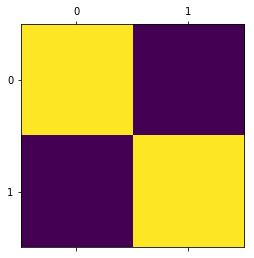

In [27]:
import matplotlib.pyplot as plt

plt.matshow(df_1b.corr())

In [28]:
import pandas as pd
import numpy as np

corr = df_1.corr()
corr.style.background_gradient()

,step,amount,fraud,male_gender
step,1,-0.00796142,-0.0118981,-0.000452078
amount,-0.00796142,1,0.489967,-0.0128801
fraud,-0.0118981,0.489967,1,-0.0251715
male_gender,-0.000452078,-0.0128801,-0.0251715,1
